# Setup

In [1]:
# import your standard packages
%run ../../global_tools/start.py

# import your local functions
from local_functions import *

# make sure the figures plot inline rather than at the end
%matplotlib inline

Default libraries loaded.


# Paths and Parameters

In [2]:
bounds_AS = [68,79,4,20]
bounds_BoB = [87,100,0,23]
bounds_plt = [65,100,0,30]

# Read Data

In [6]:
# SLA
ds_CHL = xr.open_dataset('../data/chl_to_woa.nc')
ds_CHL


<xarray.Dataset>
Dimensions:           (lat: 35, lon: 55, month: 12)
Coordinates:
  * month             (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
  * lon               (lon) float32 48.5 49.5 50.5 51.5 ... 100.5 101.5 102.5
  * lat               (lat) float32 -1.5 -0.5 0.5 1.5 ... 29.5 30.5 31.5 32.5
Data variables:
    mon_chl_mon_clim  (month, lat, lon) float64 ...

In [4]:
# WOA
ds_WOA = xr.open_dataset('../data/woa_processed.nc')
ds_WOA

<xarray.Dataset>
Dimensions:                      (coastal_loc: 1925, depth: 57, lat: 35, lon: 55, lonmin,lonmax,latmin,latmax: 4, month: 12)
Coordinates:
  * month                        (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
  * depth                        (depth) float32 0.0 5.0 10.0 ... 1450.0 1500.0
  * lon                          (lon) float32 48.5 49.5 50.5 ... 101.5 102.5
  * lat                          (lat) float32 -1.5 -0.5 0.5 ... 30.5 31.5 32.5
  * coastal_loc                  (coastal_loc) int64 0 1 2 3 ... 1922 1923 1924
  * lonmin,lonmax,latmin,latmax  (lonmin,lonmax,latmin,latmax) int64 0 1 2 3
Data variables:
    temp                         (month, depth, lat, lon) float64 ...
    psal                         (month, depth, lat, lon) float64 ...
    doxy                         (month, depth, lat, lon) float64 ...
    nitrate                      (month, depth, lat, lon) float64 ...
    phosphate                    (month, depth, lat, lon) float64 ...
    pres  

# Whole Indian Ocean Scatterplots

Text(0, 0.5, 'temp')

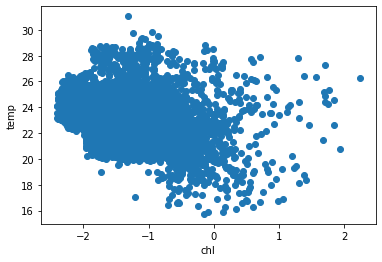

In [9]:
chl = ds_CHL.mon_chl_mon_clim.stack(allpoints=['month','lat','lon'])
temp = ds_WOA.temp_50_200.stack(allpoints=['month','lat','lon'])
doxy = ds_WOA.doxy_50_200.stack(allpoints=['month','lat','lon'])

plt.scatter(np.log(chl),temp)
plt.xlabel('chl')
plt.ylabel('temp')

Text(0, 0.5, 'doxy')

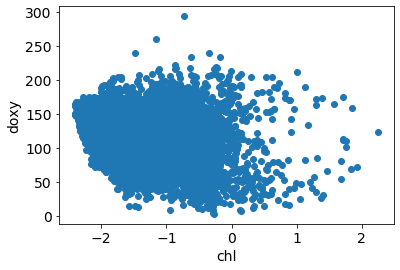

In [19]:
plt.scatter(np.log(chl),doxy)
plt.xlabel('chl')
plt.ylabel('doxy')

# Subset for AS and BoB

In [11]:
#----------------- Arabian Sea ---------------------#

lat_slice_AS = slice(bounds_AS[2],bounds_AS[3]) 
lon_slice_AS = slice(bounds_AS[0],bounds_AS[1]) 

#subset gridded data
temp_AS = ds_WOA.temp_50_200.sel(lat = lat_slice_AS, lon = lon_slice_AS)
doxy_AS = ds_WOA.doxy_50_200.sel(lat = lat_slice_AS, lon = lon_slice_AS)
chl_AS = ds_CHL.mon_chl_mon_clim.sel(lat = lat_slice_AS, lon = lon_slice_AS)
    
# convert to coastal
xx,yy = np.meshgrid(np.array(temp_AS.lon),np.array(temp_AS.lat))
xx_AS = xx.flatten()
yy_AS = yy.flatten()

mask_AS = mask_coast(xx_AS,yy_AS,np.array(ds_WOA.coastal_mask_bounds))
temp_AS = temp_AS.stack(allpoints=['lat','lon'])[:,mask_AS]
doxy_AS = doxy_AS.stack(allpoints=['lat','lon'])[:,mask_AS]
chl_AS = chl_AS.stack(allpoints=['lat','lon'])[:,mask_AS]

mon_AS = np.full(temp_AS.shape,np.nan)
for tt in range(1,13):
    mon_AS[tt-1,:] = np.ones([1,temp_AS.shape[1]])*tt
    
temp_AS = np.array(temp_AS).flatten()
doxy_AS = np.array(doxy_AS).flatten()
chl_AS = np.array(chl_AS).flatten()
mon_AS = mon_AS.flatten()

chl_AS = chl_AS[~np.isnan(temp_AS)]
doxy_AS = doxy_AS[~np.isnan(temp_AS)]
mon_AS = mon_AS[~np.isnan(temp_AS)]
temp_AS = temp_AS[~np.isnan(temp_AS)]

#---------------- Bay of Bengal --------------------#

lat_slice_BoB = slice(bounds_BoB[2],bounds_BoB[3])
lon_slice_BoB = slice(bounds_BoB[0],bounds_BoB[1])

#subset gridded data
temp_BoB = ds_WOA.temp_50_200.sel(lat = lat_slice_BoB, lon = lon_slice_BoB)
doxy_BoB = ds_WOA.doxy_50_200.sel(lat = lat_slice_BoB, lon = lon_slice_BoB)
chl_BoB = ds_CHL.mon_chl_mon_clim.sel(lat = lat_slice_BoB, lon = lon_slice_BoB)

# # # remove andaman and nicobar 
# ind = (ds_WOA.lon >91) & (ds_WOA.lon <94.5)& (ds_WOA.lat >6) & (ds_WOA.lat <14)
# temp_BoB = temp_BoB.where(~ind)
# doxy_BoB = doxy_BoB.where(~ind)
# sla_BoB = sla_BoB .where(~ind)

# convert to coastal
xx,yy = np.meshgrid(np.array(temp_BoB.lon),np.array(temp_BoB.lat))
xx_BoB = xx.flatten()
yy_BoB = yy.flatten()

mask_BoB = mask_coast(xx_BoB,yy_BoB,np.array(ds_WOA.coastal_mask_bounds))
temp_BoB = temp_BoB.stack(allpoints=['lat','lon'])[:,mask_BoB]
doxy_BoB = doxy_BoB.stack(allpoints=['lat','lon'])[:,mask_BoB]
chl_BoB = chl_BoB.stack(allpoints=['lat','lon'])[:,mask_BoB]
xx_BoB = xx_BoB[mask_BoB]
yy_BoB = yy_BoB[mask_BoB]

mon_BoB = np.full(temp_BoB.shape,np.nan)
for tt in range(1,13):
    mon_BoB[tt-1,:] = np.ones([1,temp_BoB.shape[1]])*tt

# fig, axes = plt.subplots(nrows = 1, ncols = 1,figsize=(4,6),dpi=200)
    
# plt.scatter(xx_BoB,yy_BoB, c = tcp_BoB[0,:])
    
temp_BoB = np.array(temp_BoB).flatten()
doxy_BoB = np.array(doxy_BoB).flatten()
chl_BoB = np.array(chl_BoB).flatten()
mon_BoB = mon_BoB.flatten()

chl_BoB = chl_BoB[~np.isnan(temp_BoB)]
doxy_BoB = doxy_BoB[~np.isnan(temp_BoB)]
mon_BoB = mon_BoB[~np.isnan(temp_BoB)]
temp_BoB = temp_BoB[~np.isnan(temp_BoB)]




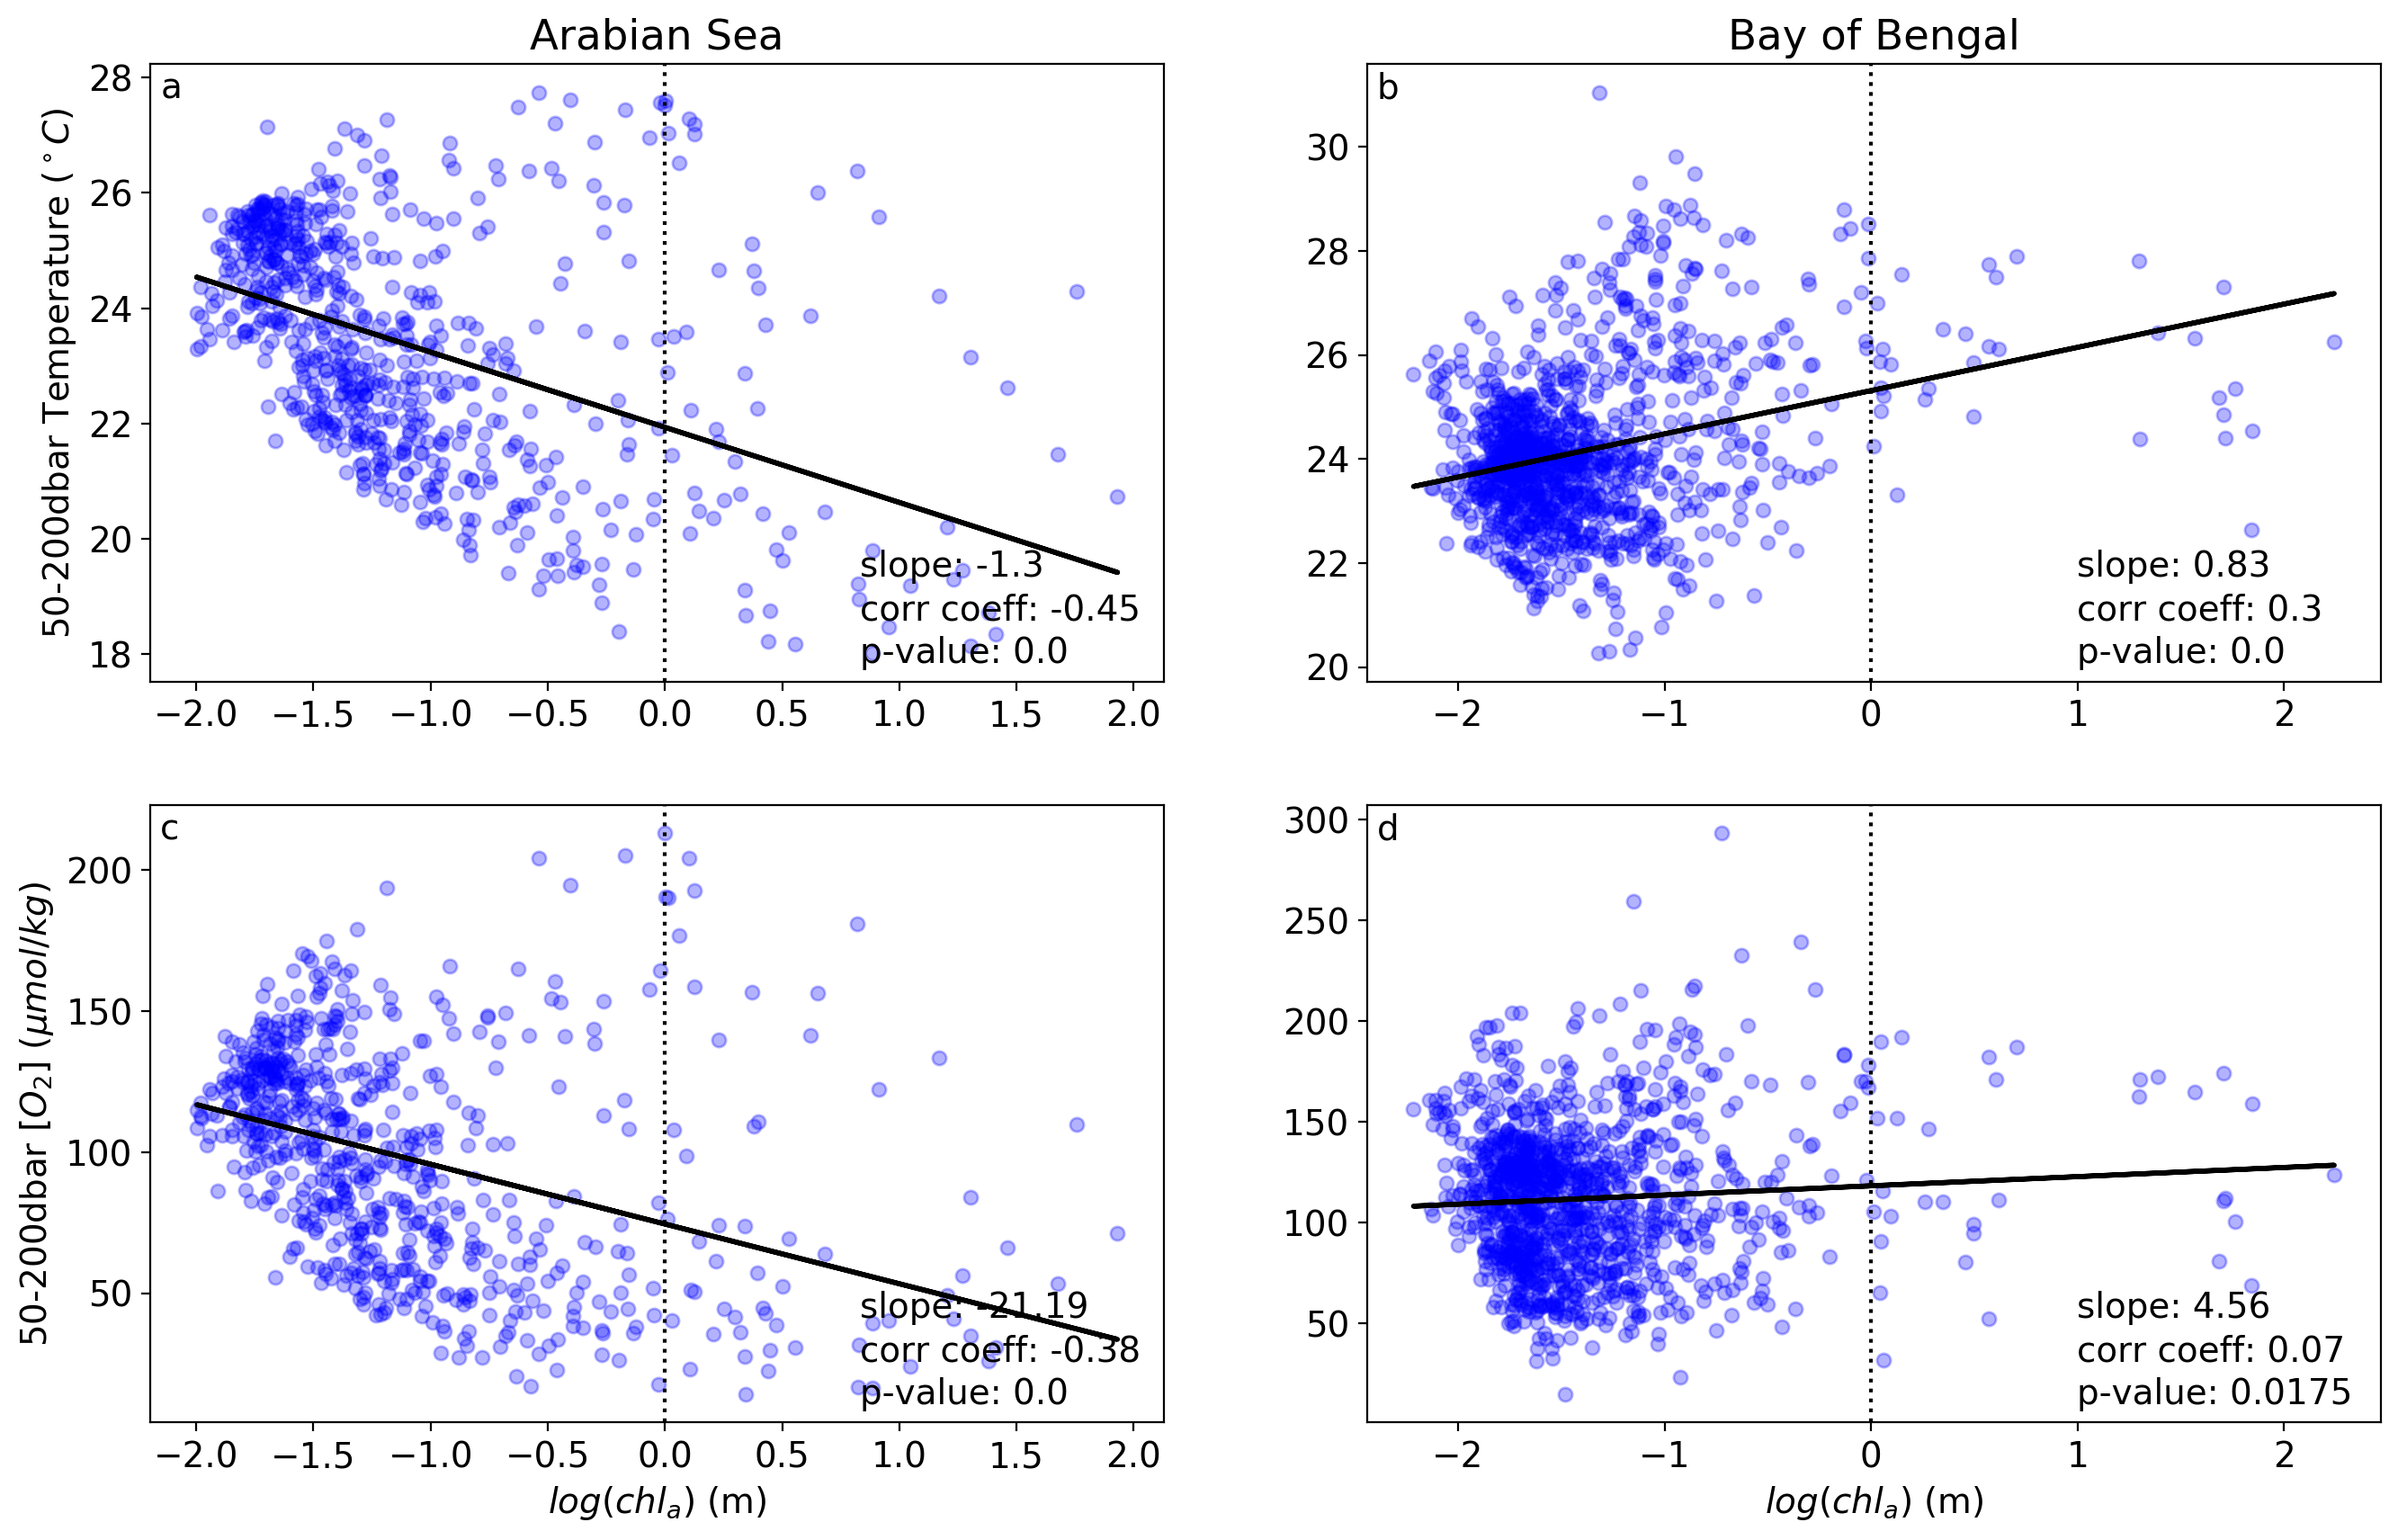

In [17]:
fig, axes = plt.subplots(nrows = 2, ncols = 2,figsize=(16,10),dpi=200)
sz = 30
alpha = 0.3

cmap = get_continuous_cmap(['#034f84','#92a8d1','#b7d7e8','#f0f0f0','#f7cac9','#f7786b','#c94c4c'])


plt.rcParams.update({'font.size': 14})

##############################################################

ax = axes[0,0]
# p = ax.scatter(sla_AS,temp_AS,c = mon_AS,s= sz,cmap=cmap)
p = ax.scatter(np.log(chl_AS),temp_AS,c = 'b',edgecolors = 'b',s= sz,alpha = alpha)
ax.axvline(x=0,color = 'k',linestyle = ':')
m, b, r, p_val,_ = stats.linregress(np.log(chl_AS), temp_AS)
ax.plot(np.log(chl_AS), m*np.log(chl_AS) + b, 'k', linewidth = 2)
# ax.set_xlim([-0.2,0.2])
ax.set_title('Arabian Sea')
ax.set_ylabel('50-200dbar Temperature ($^\circ C$)')
add_letter(ax, 'a')
add_text(ax, 'slope: ' + str(np.round(m,2)), x = 0.7,y=0.17)
add_text(ax, 'corr coeff: ' + str(np.round(r,2)), x = 0.7,y=0.1)
add_text(ax, 'p-value: ' + str(np.round(p_val,4)), x = 0.7,y=0.03)

ax = axes[0,1]
# p = ax.scatter(sla_BoB,temp_BoB,c = mon_BoB,s= sz,cmap=cmap)
p = ax.scatter(np.log(chl_BoB),temp_BoB,c = 'b',edgecolors = 'b',s= sz,alpha = alpha)
ax.axvline(x=0,color = 'k',linestyle = ':')
m, b, r, p_val,_ =stats.linregress(np.log(chl_BoB), temp_BoB)
ax.plot(np.log(chl_BoB), m*np.log(chl_BoB) + b, 'k', linewidth = 2)
# ax.set_xlim([-0.2,0.2])
# ax.set_ylim([0,140])
ax.set_title('Bay of Bengal')
add_letter(ax, 'b')
add_text(ax, 'slope: ' + str(np.round(m,2)), x = 0.7,y=0.17)
add_text(ax, 'corr coeff: ' + str(np.round(r,2)), x = 0.7,y=0.1)
add_text(ax, 'p-value: ' + str(np.round(p_val,4)), x = 0.7,y=0.03)

ax = axes[1,0]
# p = ax.scatter(sla_AS,doxy_AS,c = mon_AS,s= sz,cmap=cmap)
p = ax.scatter(np.log(chl_AS),doxy_AS,c = 'b',edgecolors = 'b',s= sz,alpha = alpha)
ax.axvline(x=0,color = 'k',linestyle = ':')
m, b, r, p_val,_ =stats.linregress(np.log(chl_AS), doxy_AS)
ax.plot(np.log(chl_AS), m*np.log(chl_AS) + b, 'k', linewidth = 2)
# ax.set_xlim([-0.2,0.2])
# ax.set_ylim([0,140])
ax.set_ylabel('50-200dbar [$O_2$] ($\mu mol/ kg$)')
ax.set_xlabel('$log(chl_a)$ (m)')
add_letter(ax, 'c')
add_text(ax, 'slope: ' + str(np.round(m,2)), x = 0.7,y=0.17)
add_text(ax, 'corr coeff: ' + str(np.round(r,2)), x = 0.7,y=0.1)
add_text(ax, 'p-value: ' + str(np.round(p_val,4)), x = 0.7,y=0.03)

ax = axes[1,1]
# p = ax.scatter(sla_BoB,doxy_BoB,c = mon_BoB,s= sz,cmap=cmap)
ax.scatter(np.log(chl_BoB),doxy_BoB,c = 'b',edgecolors = 'b',s= sz,alpha = alpha)
ax.axvline(x=0,color = 'k',linestyle = ':')
m, b, r, p_val,_ =stats.linregress(np.log(chl_BoB), doxy_BoB)
ax.plot(np.log(chl_BoB), m*np.log(chl_BoB) + b, 'k', linewidth = 2)
# ax.set_xlim([-0.2,0.2])
# ax.set_ylim([0,140])
ax.set_xlabel('$log(chl_a)$ (m)')
add_letter(ax, 'd')
add_text(ax, 'slope: ' + str(np.round(m,2)), x = 0.7,y=0.17)
add_text(ax, 'corr coeff: ' + str(np.round(r,2)), x = 0.7,y=0.1)
add_text(ax, 'p-value: ' + str(np.round(p_val,4)), x = 0.7,y=0.03)

# mon_title = ['dec','jan','feb','mar','apr','may','jun','july','aug','sep','oct','nov']

# cbar_ax = fig.add_axes([0.14, 0, 0.74, 0.03])
# cbar = fig.colorbar(p,cax=cbar_ax, pad=0.04, orientation = 'horizontal', 
#                          ticks = np.arange(1,13))
# cbar.set_ticklabels(mon_title)
# cbar.set_label('month')


In [ ]:
fig, axes = plt.subplots(nrows = 2, ncols = 2,figsize=(16,10),dpi=200)
sz = 30
alpha = 0.3

cmap = get_continuous_cmap(['#034f84','#92a8d1','#b7d7e8','#f0f0f0','#f7cac9','#f7786b','#c94c4c'])


plt.rcParams.update({'font.size': 14})

##############################################################

ax = axes[0,0]
# p = ax.scatter(sla_AS,temp_AS,c = mon_AS,s= sz,cmap=cmap)
p = ax.scatter(sla_AS,temp_AS,c = 'b',edgecolors = 'b',s= sz,alpha = alpha)
ax.axvline(x=0,color = 'k',linestyle = ':')
m, b, r, p_val,_ = stats.linregress(sla_AS, temp_AS)
ax.plot(sla_AS, m*sla_AS + b, 'k', linewidth = 2)
ax.set_xlim([-0.2,0.2])
ax.set_title('Arabian Sea')
ax.set_ylabel('50-200dbar Temperature ($^\circ C$)')
add_letter(ax, 'a')
add_text(ax, 'slope: ' + str(np.round(m,2)), x = 0.7,y=0.17)
add_text(ax, 'corr coeff: ' + str(np.round(r,2)), x = 0.7,y=0.1)
add_text(ax, 'p-value: ' + str(np.round(p_val,4)), x = 0.7,y=0.03)

ax = axes[0,1]
# p = ax.scatter(sla_BoB,temp_BoB,c = mon_BoB,s= sz,cmap=cmap)
p = ax.scatter(sla_BoB,temp_BoB,c = 'b',edgecolors = 'b',s= sz,alpha = alpha)
ax.axvline(x=0,color = 'k',linestyle = ':')
m, b, r, p_val,_ =stats.linregress(sla_BoB, temp_BoB)
ax.plot(sla_BoB, m*sla_BoB + b, 'k', linewidth = 2)
ax.set_xlim([-0.2,0.2])
# ax.set_ylim([0,140])
ax.set_title('Bay of Bengal')
add_letter(ax, 'b')
add_text(ax, 'slope: ' + str(np.round(m,2)), x = 0.7,y=0.17)
add_text(ax, 'corr coeff: ' + str(np.round(r,2)), x = 0.7,y=0.1)
add_text(ax, 'p-value: ' + str(np.round(p_val,4)), x = 0.7,y=0.03)

ax = axes[1,0]
# p = ax.scatter(sla_AS,doxy_AS,c = mon_AS,s= sz,cmap=cmap)
p = ax.scatter(sla_AS,doxy_AS,c = 'b',edgecolors = 'b',s= sz,alpha = alpha)
ax.axvline(x=0,color = 'k',linestyle = ':')
m, b, r, p_val,_ =stats.linregress(sla_AS, doxy_AS)
ax.plot(sla_AS, m*sla_AS + b, 'k', linewidth = 2)
ax.set_xlim([-0.2,0.2])
# ax.set_ylim([0,140])
ax.set_ylabel('50-200dbar [$O_2$] ($\mu mol/ kg$)')
ax.set_xlabel('Sea Level Anomaly (m)')
add_letter(ax, 'c')
add_text(ax, 'slope: ' + str(np.round(m,2)), x = 0.7,y=0.17)
add_text(ax, 'corr coeff: ' + str(np.round(r,2)), x = 0.7,y=0.1)
add_text(ax, 'p-value: ' + str(np.round(p_val,4)), x = 0.7,y=0.03)

ax = axes[1,1]
# p = ax.scatter(sla_BoB,doxy_BoB,c = mon_BoB,s= sz,cmap=cmap)
ax.scatter(sla_BoB,doxy_BoB,c = 'b',edgecolors = 'b',s= sz,alpha = alpha)
ax.axvline(x=0,color = 'k',linestyle = ':')
m, b, r, p_val,_ =stats.linregress(sla_BoB, doxy_BoB)
ax.plot(sla_BoB, m*sla_BoB + b, 'k', linewidth = 2)
ax.set_xlim([-0.2,0.2])
# ax.set_ylim([0,140])
ax.set_xlabel('Sea Level Anomaly (m)')
add_letter(ax, 'd')
add_text(ax, 'slope: ' + str(np.round(m,2)), x = 0.7,y=0.17)
add_text(ax, 'corr coeff: ' + str(np.round(r,2)), x = 0.7,y=0.1)
add_text(ax, 'p-value: ' + str(np.round(p_val,4)), x = 0.7,y=0.03)

# mon_title = ['dec','jan','feb','mar','apr','may','jun','july','aug','sep','oct','nov']

# cbar_ax = fig.add_axes([0.14, 0, 0.74, 0.03])
# cbar = fig.colorbar(p,cax=cbar_ax, pad=0.04, orientation = 'horizontal', 
#                          ticks = np.arange(1,13))
# cbar.set_ticklabels(mon_title)
# cbar.set_label('month')



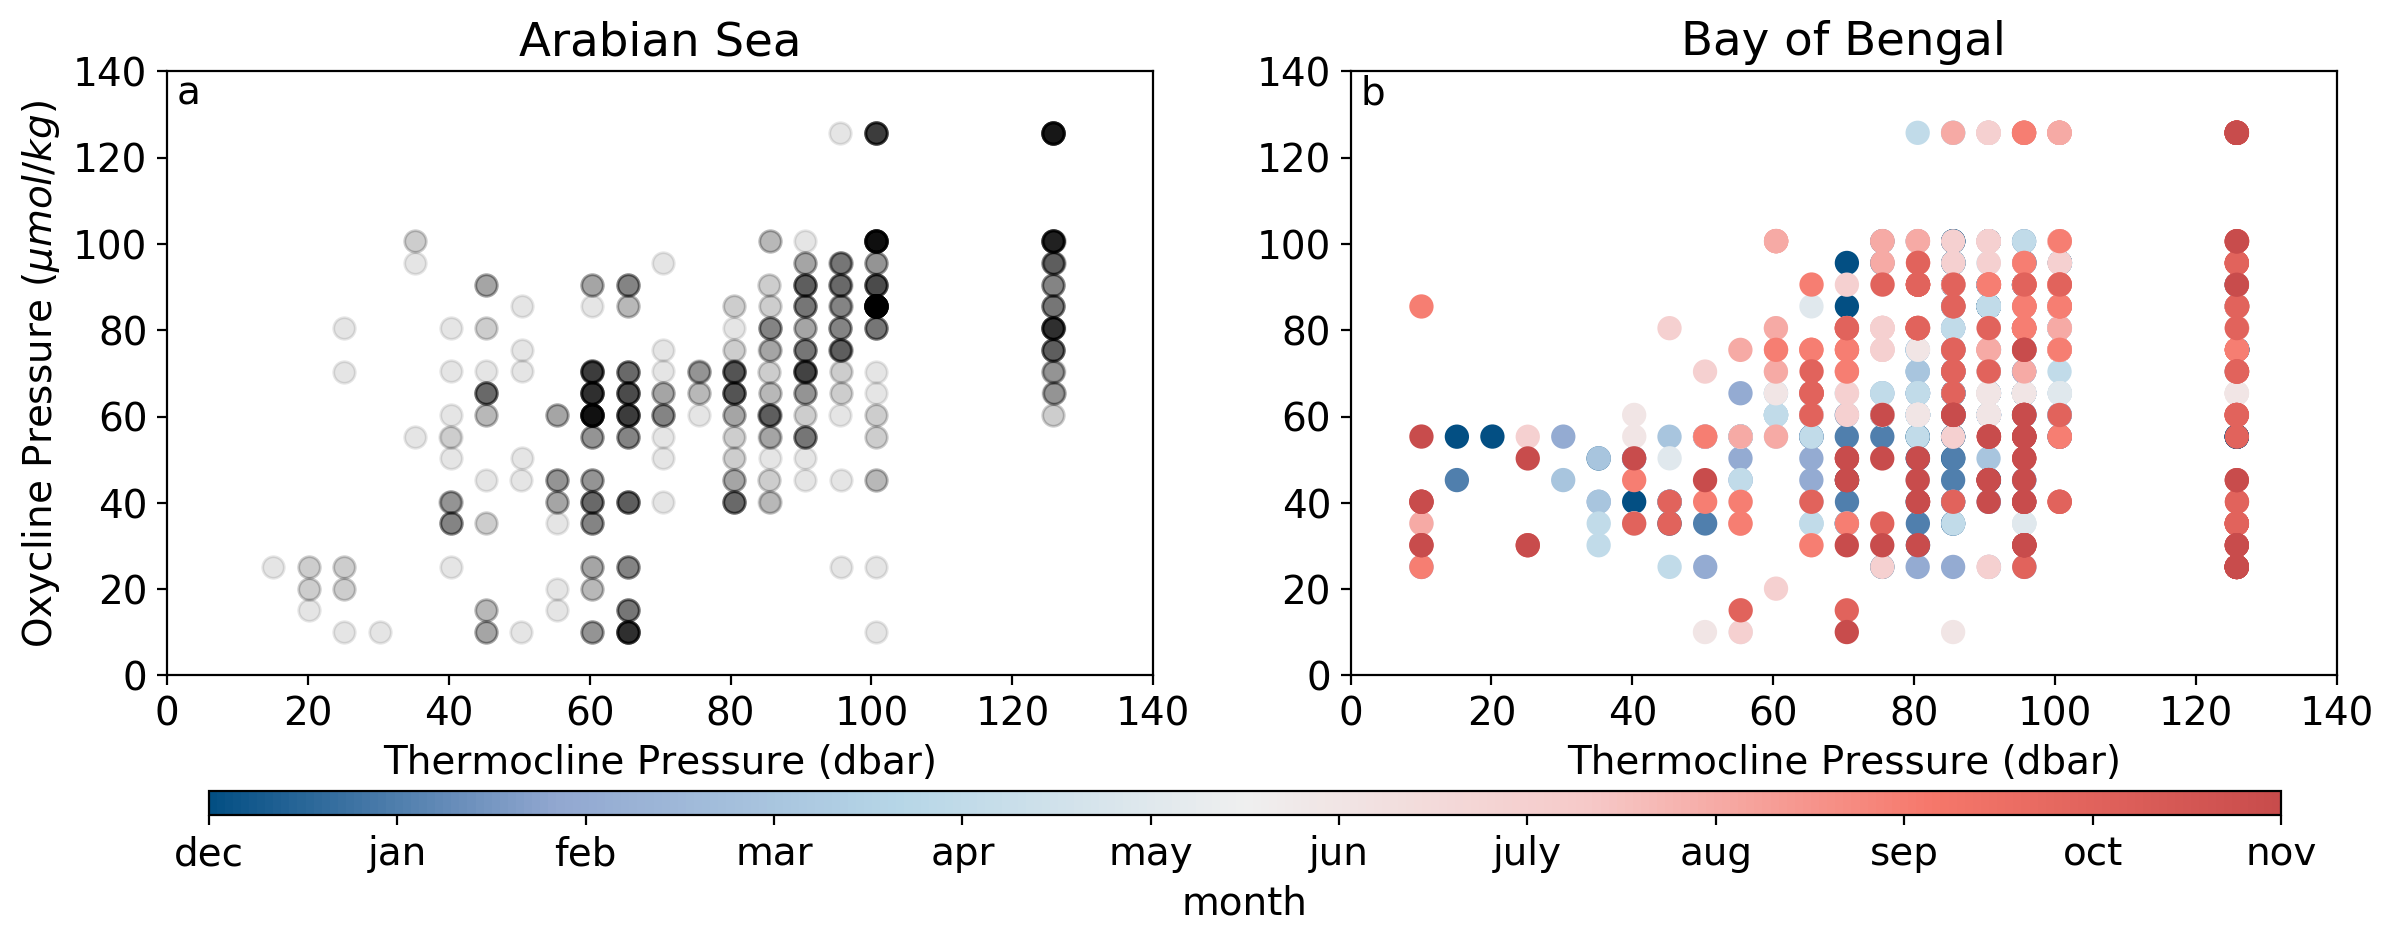

In [30]:
fig, axes = plt.subplots(nrows = 1, ncols = 2,figsize=(14,4),dpi=200)
sz = 60

cmap = get_continuous_cmap(['#034f84','#92a8d1','#b7d7e8','#f0f0f0','#f7cac9','#f7786b','#c94c4c'])


plt.rcParams.update({'font.size': 14})

##############################################################

ax = axes[0]
p = ax.scatter(tcp_AS,ocp_AS,c = 'k',s= sz,cmap=cmap, alpha = 0.1)
ax.set_xlim([0,140])
ax.set_ylim([0,140])
ax.set_title('Arabian Sea')
ax.set_ylabel('Oxycline Pressure ($\mu mol /kg$)')
ax.set_xlabel('Thermocline Pressure (dbar)')
add_letter(ax, 'a')

ax = axes[1]
p = ax.scatter(tcp_BoB,ocp_BoB,c = mon_BoB,s= sz,cmap=cmap)
ax.set_xlim([0,140])
ax.set_ylim([0,140])
ax.set_title('Bay of Bengal')
ax.set_xlabel('Thermocline Pressure (dbar)')
add_letter(ax, 'b')


mon_title = ['dec','jan','feb','mar','apr','may','jun','july','aug','sep','oct','nov']

cbar_ax = fig.add_axes([0.14, -0.05, 0.74, 0.03])
cbar = fig.colorbar(p,cax=cbar_ax, pad=0.04, orientation = 'horizontal', 
                         ticks = np.arange(1,13))
cbar.set_ticklabels(mon_title)
cbar.set_label('month')



In [27]:
temp_BoB[~np.isnan(temp_BoB)].shape,doxy_BoB[~np.isnan(doxy_BoB)].shape,sla_BoB[~np.isnan(sla_BoB)].shape

((1056,), (1056,), (1356,))

In [30]:
temp_BoB[~np.isnan(temp_BoB)].shape,doxy_BoB[~np.isnan(doxy_BoB)].shape,sla_BoB[~np.isnan(sla_BoB)].shape

((1188,), (1188,), (1512,))